# Binary classification based on Logistic Regression with a quadratic regularization

## import library

In [230]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [231]:
fname_data_train    = 'assignment_10_data_train.csv'
fname_data_test     = 'assignment_10_data_test.csv'

data_train  = np.genfromtxt(fname_data_train, delimiter=',')
data_test   = np.genfromtxt(fname_data_test, delimiter=',')

num_data=data_train.shape[0]

label_train = data_train[:,2]
label_test = data_test[:,2]

## plot the data

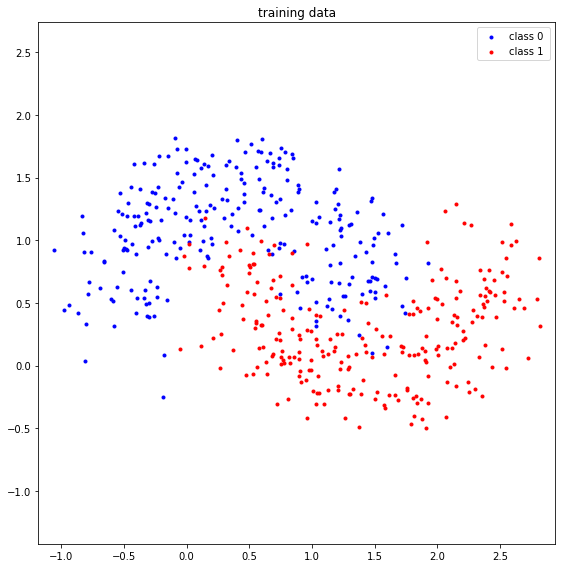

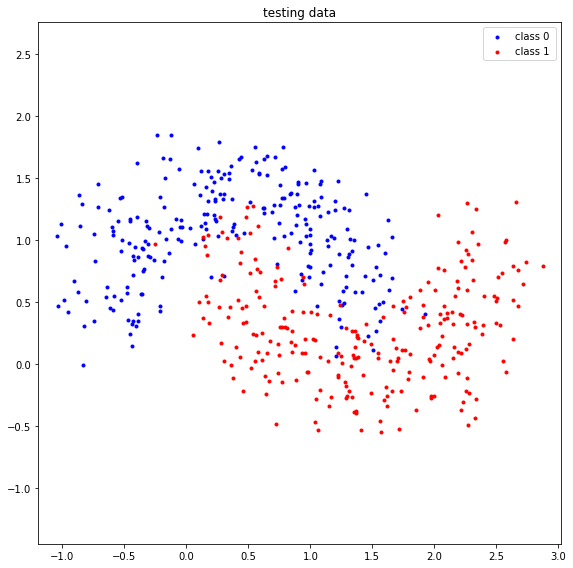

In [232]:
plt.figure(figsize=(8,8))

plt.scatter(data_train[:, 0][label_train == 0],data_train[:, 1][label_train == 0], c="b", marker=".", label="class 0 ")
plt.scatter(data_train[:, 0][label_train == 1],data_train[:, 1][label_train == 1], c="r", marker=".", label="class 1 ")
plt.title('training data')
plt.axis('equal')
plt.legend()
plt.tight_layout()

plt.figure(figsize=(8,8))

plt.scatter(data_test[:, 0][label_test == 0],data_test[:, 1][label_test == 0], c="b", marker=".", label="class 0 ")
plt.scatter(data_test[:, 0][label_test == 1],data_test[:, 1][label_test == 1], c="r", marker=".", label="class 1 ")
plt.title('testing data')
plt.axis('equal')
plt.legend()
plt.tight_layout()

plt.show()

## define feature function

In [233]:
def feature_function(x, y):
    feature = np.array([np.ones(x.size),x,x**2,x**3,x**4,x**5,y])
    return feature

## define regression function based on the feature function

In [234]:
def regression_function(theta, feature):
    value = theta@feature
    return value

## define regularization function on the model parameters

In [235]:
def regularization_function(theta):
    d = len(theta)
    value = regression_function(theta,feature_function(data_train[:,0],data_train[:,1]))
    value = value/d
    return value

## define sigmoid function

In [236]:
def logistic_function(x):
    z = 1/(1+np.exp((-1)*x))
    return z

## define loss function where $\alpha$ is a weight for the quadratic regularization term (Note that you need to add a small number (np.finfo(float).eps) inside logarithm function in order to avoid $\log( 0 )$)

In [237]:
def compute_loss_feature(theta, feature, label, alpha):
    loss = 0
    feature=feature.T
    e = np.finfo(float).eps
    for i in range(num_data):
        f = regression_function(theta,feature[i])
        
        h = logistic_function(f)
        
        loss = loss + label[i]*np.log(h+e)+(1-label[i])*np.log((1-h+e))
    
    loss = loss/num_data*(-1)
    loss = np.sum(loss) + alpha/2*(theta.T@theta)
    return loss

## define gradient vector for the model parameters with the quadratic regularization term whose weight is $\alpha$

In [238]:
def compute_gradient_feature(theta, feature, label, alpha):
    gradient = np.zeros(theta.size)
    feature=feature.T
    for i in range(num_data) :
        a = regression_function(theta, feature[i])
        f = logistic_function(a)
        h = f-label[i]
        gradient = gradient + h*np.array((feature[i]))
    
    gradient = gradient/num_data+alpha*theta
    return gradient

## compute the accuracy

In [239]:
def compute_accuracy(theta, feature, label):
    val = regression_function(theta, feature)
    h = np.array(logistic_function(val))
    p = (h >= 0.5)
    correct = np.sum(p.astype(int) == label)
    accuracy = correct/num_data
    return accuracy

## gradient descent for the model parameters $\theta$

In [272]:
num_iteration   = 10000
learning_rate   = 0.03
alpha           = 0.005

theta = np.array((0,0,0,0,0,0,0))

feature_training = feature_function(data_train[:, 0],data_train[:, 1])
feature_testing = feature_function(data_test[:, 0],data_test[:, 1])
dim_feature = theta.size

print(feature_training.shape)

(7, 500)


In [273]:
theta_iteration             = np.zeros((num_iteration, dim_feature))
loss_iteration_train        = np.zeros(num_iteration)
loss_iteration_test         = np.zeros(num_iteration)
accuracy_iteration_train    = np.zeros(num_iteration)
accuracy_iteration_test     = np.zeros(num_iteration)

In [274]:
for i in range(num_iteration):
    theta = theta - learning_rate * compute_gradient_feature(theta, feature_training, label_train ,alpha)
   
    loss_train = compute_loss_feature(theta, feature_training, label_train,alpha)
    loss_test = compute_loss_feature(theta, feature_testing, label_test,alpha)
   
    theta_iteration[i] = theta
    
    loss_iteration_train[i] = loss_train
    loss_iteration_test[i] = loss_test
    
    accuracy_iteration_train[i]   = compute_accuracy(theta, feature_training, label_train)
    accuracy_iteration_test[i]    = compute_accuracy(theta, feature_testing, label_test)
   
    #print(i,"loss(train) = ",loss_iteration_train[i],"loss(test) = ",loss_iteration_test[i],"accuracy(train) = ",
         #accuracy_iteration_train[i],"accuracy(test) = ",accuracy_iteration_test[i])

theta_optimal = theta


## compute accuracy of the classifiers

In [275]:
accuracy_train  = compute_accuracy(theta_optimal, feature_training, label_train)
accuracy_test   = compute_accuracy(theta_optimal, feature_testing, label_test)
print(accuracy_train,accuracy_test)

0.908 0.922


## plot the results

In [276]:
loss_iteration_train.shape

(10000,)

In [279]:
def plot_loss_curve(loss_iteration_train, loss_iteration_test):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')

    
    plt.plot(loss_iteration_train, color = 'red',label = "train")
    plt.plot(loss_iteration_test, color = 'blue',label = "test")
    

    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.legend(loc='upper right')
    plt.show()
    

In [280]:
def plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    
    plt.plot(accuracy_iteration_train, color = 'red',label = "train")
    plt.plot(accuracy_iteration_test, color = 'blue',label = "test")
    

    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.legend(loc='upper right')
    plt.show()

In [281]:
def plot_data(data_train, data_test):
    
    f = plt.figure(figsize=(16,8))   
    
    plt.figure(figsize=(8,8))

    plt.scatter(data_train[:, 0][label_train == 0],data_train[:, 1][label_train == 0], c="b", marker=".", label="class 0 ")
    plt.scatter(data_train[:, 0][label_train == 1],data_train[:, 1][label_train == 1], c="r", marker=".", label="class 1 ")
    plt.title('training data')
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()

    plt.figure(figsize=(8,8))

    plt.scatter(data_test[:, 0][label_test == 0],data_test[:, 1][label_test == 0], c="b", marker=".", label="class 0 ")
    plt.scatter(data_test[:, 0][label_test == 1],data_test[:, 1][label_test == 1], c="r", marker=".", label="class 1 ")
    plt.title('testing data')
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()

    plt.show()

In [288]:
def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    
    plt.title('model parameter')
    
    theta_iteration=theta_iteration.T
    plt.plot(theta_iteration[0], color = 'red',label='$\Theta$ 0')
    plt.plot(theta_iteration[1], color = 'green',label='$\Theta$ 1')
    plt.plot(theta_iteration[2], color = 'blue',label='$\Theta$ 2')
    plt.plot(theta_iteration[3], color = 'yellow',label='$\Theta$ 3')
    plt.plot(theta_iteration[4], color = 'orange',label='$\Theta$ 4')
    plt.plot(theta_iteration[5], color = 'purple',label='$\Theta$ 5')
    plt.plot(theta_iteration[6], color = 'indigo',label='$\Theta$ 6')

    plt.xlabel('iteration')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

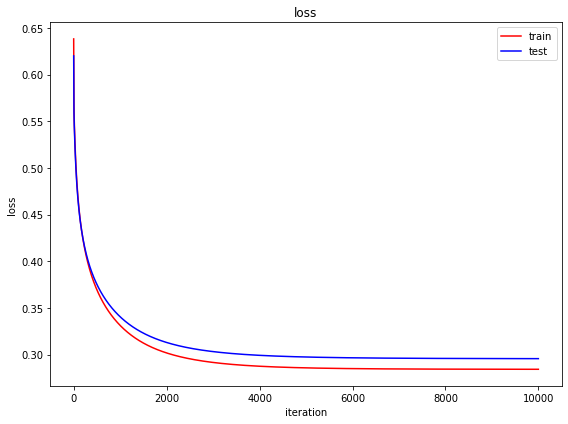

In [289]:
plot_loss_curve(loss_iteration_train,loss_iteration_test)

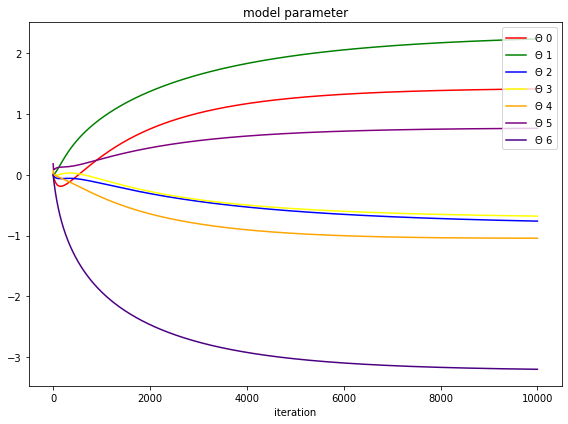

In [290]:
plot_model_parameter(theta_iteration)

In [291]:
def plot_classifier(data, theta):
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    
    XX = np.arange(data[:,0].min(),data[:,0].max(),0.01)
    YY = np.arange(data[:,1].min(),data[:,1].max(),0.01)
    
    XX,YY = np.meshgrid(XX,YY)
    X=XX.ravel()
    Y=YY.ravel()

    feature=feature_function(X,Y)
    z = regression_function(theta,feature)
    zz =z.reshape(XX.shape)
    
    divnorm = colors.TwoSlopeNorm(vmin=zz.min(), vcenter=0, vmax=zz.max())
    plt.contour(XX, YY, zz, levels=[0],colors="black")
    plt.contourf(XX, YY, zz, cmap=plt.get_cmap('RdBu_r'), norm = divnorm,
                 levels=np.linspace(zz.min(), zz.max(), 50))
    plt.colorbar()
    
    plt.scatter(data[:, 0][label_train == 1],data[:, 1][label_train == 1], c="r", marker=".", label="class 1 ")
    plt.scatter(data[:, 0][label_train == 0],data[:, 1][label_train == 0], c="b", marker=".", label="class 0 ")

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    

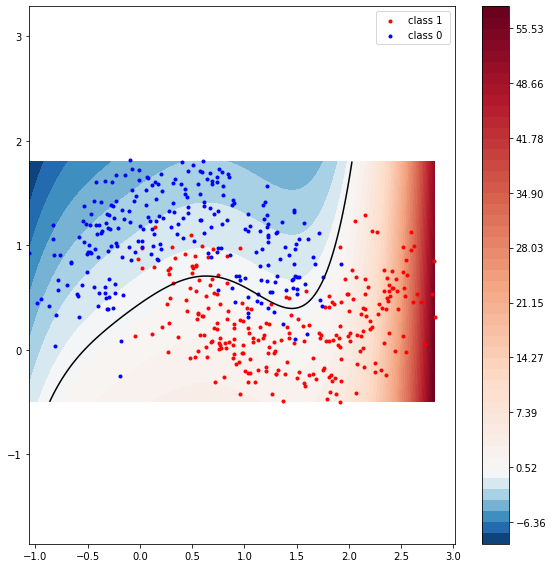

In [292]:
plot_classifier(data_train, theta_optimal)

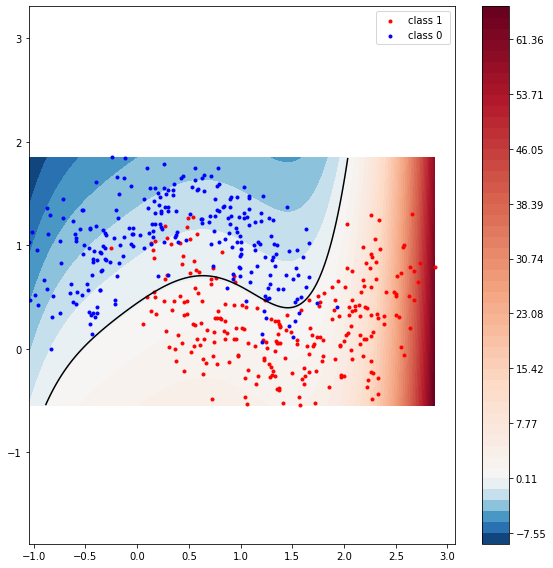

In [293]:
plot_classifier(data_test, theta_optimal)

***

# results

***

1. plot the input data (training on the left sub-figure and testing on the right sub-figure) in blue for class 0 and in red for class 1 from the file [assignment_10_data_train.csv] and [assignment_10_data_test.csv], respectively,

<Figure size 1152x576 with 0 Axes>

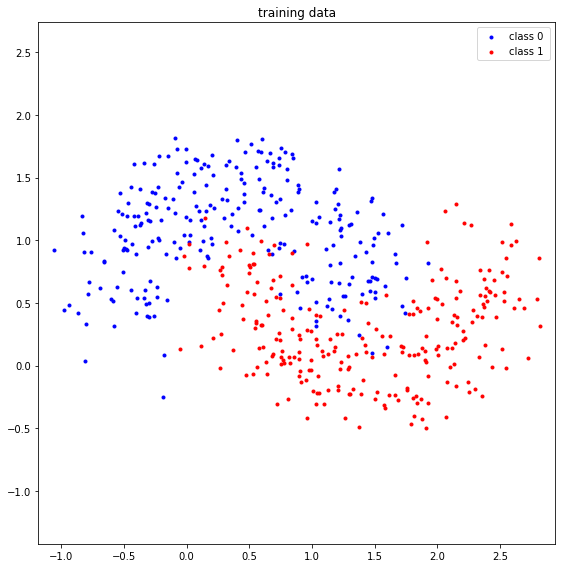

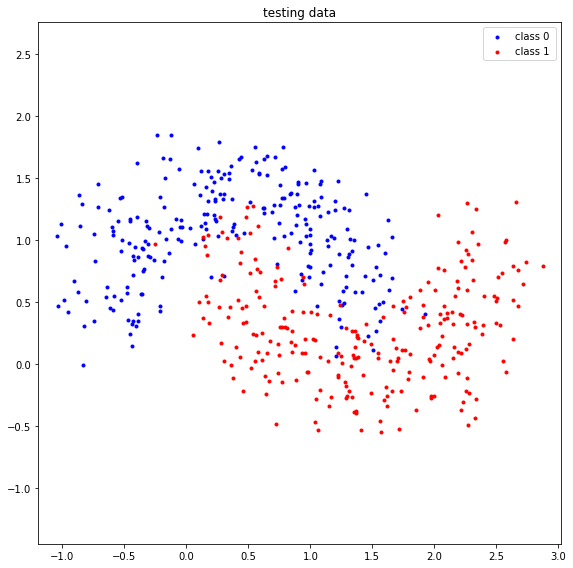

In [294]:
plot_data(data_train, data_test)

***

2. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors

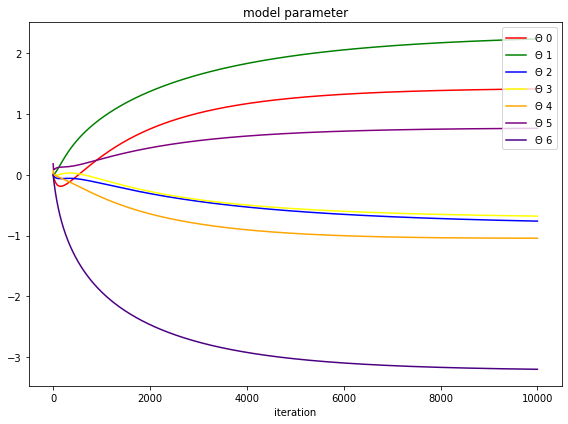

In [295]:
plot_model_parameter(theta_iteration)

***

3. plot the training loss in red curve and the testing loss in blue curve over the gradient descent iterations

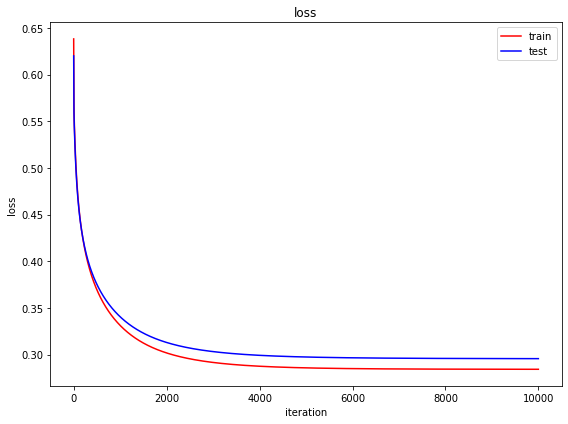

In [296]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

***

4. plot the training accuracy in red curve and the testing accuracy in blue curve over the gradient descent iterations

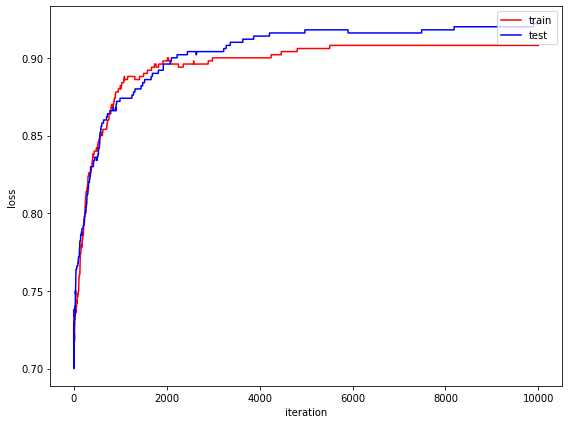

In [297]:
plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test)

***

5. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the training data

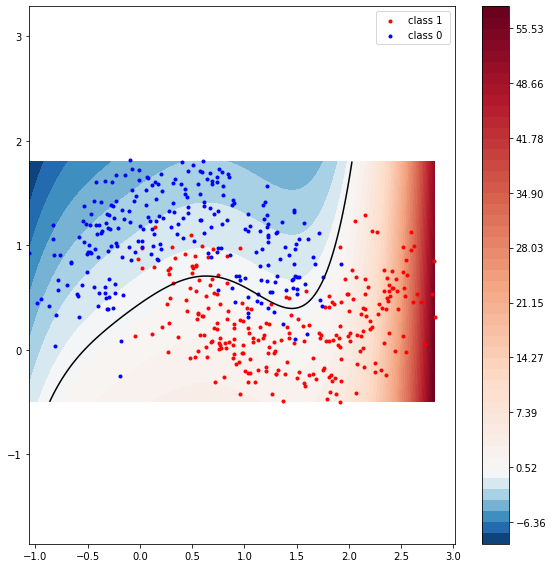

In [298]:
plot_classifier(data_train, theta_optimal)

***

6. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the testing data

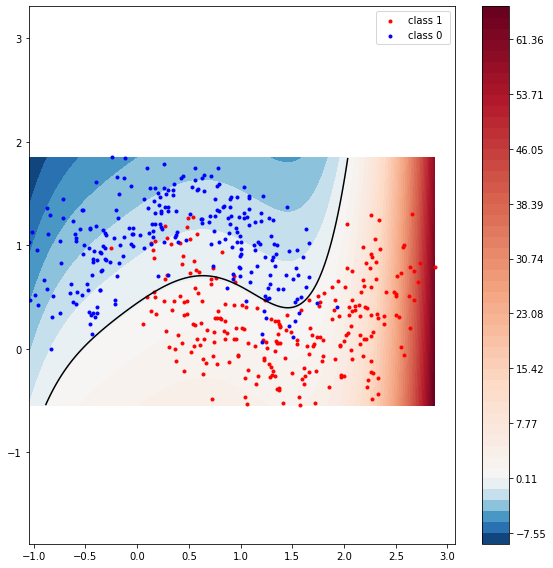

In [299]:
plot_classifier(data_test, theta_optimal)

***

7. print out the final training accuracy and the final testing accuracy in number with 5 decimal places (e.g. 0.98765)

In [300]:
print('accuract(train): {:.5f}%'.format(accuracy_train))
print('accuracy(test) : {:.5f}%'.format(accuracy_test))

accuract(train): 0.90800%
accuracy(test) : 0.92200%
